# Demo of functionality available in wildcat-api-python

This demo shows the available functionality using default settings for parameters. For more detail on what you can configure as a user, see the documentation and description of individual methods in the WildCATApi-class.

### Before you start

To be able to run this notebook, you should:
- install the wildcat-api-python package in a virtual environment (`pip install -e .` from the main directory of the repository).
- install the requirements in requirements.txt (if not already installed automatically in the previous step).
- create a file '.env' in the root of the wildcat-api-python-repository, containing your Cluey credentials. These will be read in this notebook to log in. The file should look like this:
```
# Cluey credentials
USERNAME=your_username
PASSWORD=your_password
```

## Configuration

In [1]:
import os

In [2]:
import matplotlib.pyplot as plt
from dotenv import load_dotenv

In [3]:
from wildcatpy import wclogging
from wildcatpy.api_calls import WildCATApi
from wildcatpy.src import helper_functions as helpers

In [4]:
logger = wclogging.get_wc_logger()
wclogging.set_wc_log_level("DEBUG")

In [5]:
plt.style.use("ggplot")

In [6]:
load_dotenv()

True

In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
username = os.getenv("USERNAME")  # you can also type your password here manually
password = os.getenv("PASSWORD")  # You can also type your username here manually

## Demo-time, here we go!

In [9]:
api_call = WildCATApi(username, password)

### Login

In [10]:
# expected output if successful: '<Response [200]>'
api_call.login(username, password)

<Response [200]>

In [11]:
# It is not necessary to log out, but you can do so by calling:
# api_call.logout()

### Obtain the groups you have access to

In [12]:
info = api_call.get_groups()

In [13]:
info.head()

,name,description,n_records
0,focus-project-2435800,3june2020,392
1,focus-project-7136973,Cluey Data Collector,621
2,focus-project-7811010,Creekish mountains,152
3,focus-project-1234,Demo Upload,1848
4,focus-project-GFW,GFW,41229


In [14]:
# for other functionality, you can specify a group to extract data from
groups = "focus-project-1234"

### Get observations

You can control the scope (e.g. coordinates) of these observations in more detail than done in this example.
For reference: ~500 observations typically take ~1 minute to read.

**NOTE:**
 Each observation may have multiple concepts (tags) associated with it,
 in which case the number of rows in the observations-dataframe is larger than
 the number of records of data type 'observations' mentioned by the logger.

TODO: provide detailed instructions.

In [15]:
observations = api_call.get_observations(groups=groups, operator=["intersects"])

2024-01-26 07:37:26 [api_calls.py:430] INFO - Group 'focus-project-1234' contains 1848 records for data type 'observations'.
2024-01-26 07:37:26 [api_calls.py:444] INFO - Started reading available records.
2024-01-26 07:38:38 [api_calls.py:454] INFO - Finished reading available records.


In [16]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3635 entries, 0 to 3634
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   entityId         3635 non-null   object
 1   entityType       3635 non-null   object
 2   entityName       3635 non-null   object
 3   projectId        3635 non-null   object
 4   projectName      3635 non-null   object
 5   observationType  3635 non-null   object
 6   when             3635 non-null   object
 7   where            3635 non-null   object
 8   agentName        3635 non-null   object
 9   conceptLabel     3609 non-null   object
 10  conceptId        3609 non-null   object
dtypes: object(11)
memory usage: 312.5+ KB


In [17]:
observations["agentName"] = "#####"
observations.head()

,entityId,entityType,entityName,projectId,projectName,observationType,when,where,agentName,conceptLabel,conceptId
0,O1234-431049404128863518-178,animal,Observation,1234,Demo Upload,animal,2018-07-31T00:00:00+02:00,"{'type': 'Point', 'coordinates': [16.46301901,...",#####,Female,https://sensingclues.poolparty.biz/SCCSSOntolo...
1,O1234-431049404128863518-178,animal,Observation,1234,Demo Upload,animal,2018-07-31T00:00:00+02:00,"{'type': 'Point', 'coordinates': [16.46301901,...",#####,Gunshot,https://sensingclues.poolparty.biz/SCCSSOntolo...
2,O1234-431049404128863518-178,animal,Observation,1234,Demo Upload,animal,2018-07-31T00:00:00+02:00,"{'type': 'Point', 'coordinates': [16.46301901,...",#####,_Missing,https://sensingclues.poolparty.biz/SCCSSOntolo...
3,O1234-431049404128863518-178,animal,Observation,1234,Demo Upload,animal,2018-07-31T00:00:00+02:00,"{'type': 'Point', 'coordinates': [16.46301901,...",#####,Animal sighting,https://sensingclues.poolparty.biz/SCCSSOntolo...
4,O1234-8298573771345653336-2149,human activity,Observation,1234,Demo Upload,human activity,2018-07-31T00:00:00+02:00,"{'type': 'Point', 'coordinates': [17.58417983,...",#####,Stone,https://sensingclues.poolparty.biz/SCCSSOntolo...


### Get track metadata

Note that you can control the scope (e.g. coordinates) of these observations in more detail than done here.

TODO: provide detailed instructions.

In [18]:
tracks = api_call.get_tracks(groups=groups, time_until="23:59:54-00:00")

2024-01-26 07:38:38 [api_calls.py:430] INFO - Group 'focus-project-1234' contains 0 records for data type 'tracks'.
2024-01-26 07:38:38 [api_calls.py:456] WARNING - No data available for 'tracks', returning empty dataframe.


In [19]:
tracks["agentName"] = "#####"
tracks.head()

,agentName


### Add geosjon-data to tracks

Note that you can control the scope (e.g. coordinates) of these observations in more detail than done here.

TODO: provide detailed instructions.

In [20]:
if tracks.shape[0] > 0:
    track_entities = tracks["entityId"].unique().tolist()
    tracks_geo = api_call.add_geojson_to_track(track_entities)
    tracks_merged = tracks.merge(tracks_geo, how="left", on="entityId")
    tracks_merged["agentName"] = "#####"
else:
    logger.warning(
        f"No tracks available for group {groups}, " f"cannot obtain geojson-data"
    )
    tracks_merged = tracks

2024-01-26 07:38:38 [2456454027.py:7] WARNING - No tracks available for group focus-project-1234, cannot obtain geojson-data


In [21]:
tracks_merged.head()

,agentName


### Get all available layers (projects)

In [22]:
layers = api_call.get_all_layers()

In [23]:
layers

,pid,lid,layerName,description,geometryType
0,1234,0,test_multipolygon,All MultiPolygon geometries for layer test_mul...,MultiPolygon
1,1234,1,test_polygon,All Polygon geometries for layer test_polygon,Polygon


### Get details (features) for an individual layer

In [24]:
df = api_call.get_layer_features(layer_name="test_multipolygon")

#### [optional] Plot available geometries (requires Folium)

In [25]:
# !pip install folium

In [26]:
import folium

In [27]:
poly_map = folium.Map([51.9244, 4.4777], zoom_start=8, tiles="cartodbpositron")
for _, geometry in df["geometry"].items():
    folium.GeoJson(geometry).add_to(poly_map)
folium.LatLngPopup().add_to(poly_map)
poly_map

### Get all available concepts and their hierarchy

As shown later in this notebook, you can use this information to subsequently query:
- the details for a specific concept
- check the occurrence of each concept in the group(s) of observations you have access to.

In [28]:
hierarchy = api_call.get_hierarchy()

In [29]:
hierarchy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1475 non-null   object
 1   parent        1475 non-null   object
 2   label         1475 non-null   object
 3   altLabels     726 non-null    object
 4   children      154 non-null    object
 5   isTopConcept  1475 non-null   bool  
dtypes: bool(1), object(5)
memory usage: 59.2+ KB


### Get details for specific concepts in the hierarchy

You can get information on children or the parents of a concept in the hierarchy by filtering on its label or id. Use the available helper functions to do so. For example, you could do the following for the concept of a "Kite" (oid = "https://sensingclues.poolparty.biz/SCCSSOntology/222"):

```
oid = "https://sensingclues.poolparty.biz/SCCSSOntology/222"
helpers.get_children_for_id(hierarchy, oid)
helpers.get_parent_for_id(hierarchy, oid)
helpers.get_label_for_id(hierarchy, oid)
```

or, if filtering on the label itself:

```
label = 'Kite'
helpers.get_children_for_label(hierarchy, label)
helpers.get_parent_for_label(hierarchy, label)
helpers.get_id_for_label(hierarchy, label)
```

N.B. Alternatively, you could directly filter the `hierarchy`-dataframe yourself of course.

#### Tell me, what animal belongs to this concept id?

In [30]:
oid = "https://sensingclues.poolparty.biz/SCCSSOntology/222"
helpers.get_label_for_id(hierarchy, oid)

'Kite'

#### Does this Kite have any children?

In [31]:
label = "Kite"
children_label = helpers.get_children_for_label(hierarchy, label)
children_label

['https://sensingclues.poolparty.biz/SCCSSOntology/223',
 'https://sensingclues.poolparty.biz/SCCSSOntology/224']

#### What are the details for these children?

In [32]:
hierarchy.loc[hierarchy["id"].isin(children_label)]

,id,parent,label,altLabels,children,isTopConcept
605,https://sensingclues.poolparty.biz/SCCSSOntolo...,https://sensingclues.poolparty.biz/SCCSSOntolo...,Kite red,"[red_kite, Milvus milvus, Kite_red, Milvus mil...",NaN,False
847,https://sensingclues.poolparty.biz/SCCSSOntolo...,https://sensingclues.poolparty.biz/SCCSSOntolo...,Kite black,"[Kite_black, Black kite, Milvus migrans, Kite_...",NaN,False


### Count concepts related to observations

Get the number of observations per concept in the ontology (hierarchy),
e.g. the number of observations listed as a "Kite" ("https://sensingclues.poolparty.biz/SCCSSOntology/222").

You can filter on for instance:
- `date_from` and `date_until`.
- A list of child concepts, e.g. by extracting children for the label "Animal sighting" from hierarchy (see example below).
- Note that specifying a range of coordinates (via `coord`) currently does **not** work as a filter.

In [33]:
date_from = "2010-01-01"
date_until = "2024-01-01"
label = "Animal sighting"
children_label = helpers.get_children_for_label(hierarchy, label)
concept_counts = api_call.get_concept_counts(
    groups, date_from=date_from, date_until=date_until, concepts=children_label
)
concept_counts.head()

,frequency,_value
0,98,https://sensingclues.poolparty.biz/SCCSSOntolo...
1,97,https://sensingclues.poolparty.biz/SCCSSOntolo...
2,1,https://sensingclues.poolparty.biz/SCCSSOntolo...
3,1,https://sensingclues.poolparty.biz/SCCSSOntolo...
4,12,https://sensingclues.poolparty.biz/SCCSSOntolo...


#### Example: visualize concept counts

To make the visualization intelligible, you can add information on labels from the `hierarchy`-dataframe.

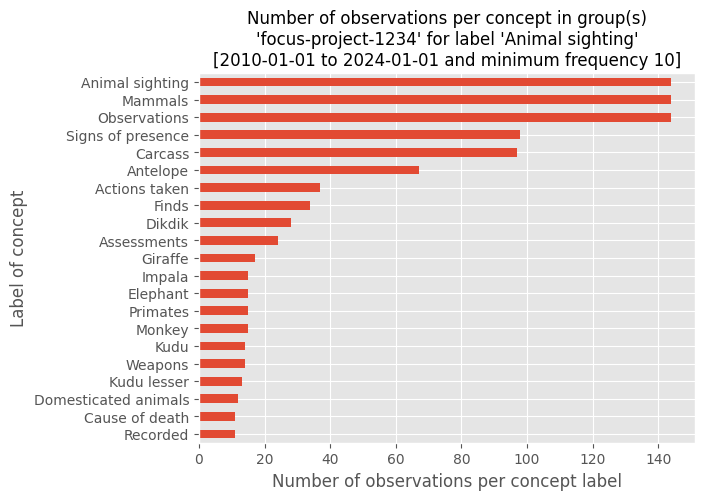

In [34]:
min_freq = 10
if not concept_counts.empty:
    concept_freq = concept_counts.merge(
        hierarchy, left_on="_value", right_on="id", how="left"
    )
    concept_freq["label"] = concept_freq["label"].fillna(concept_freq["_value"])
    concept_freq = concept_freq.set_index("label")["frequency"].sort_values(
        ascending=True
    )

    concept_freq.loc[concept_freq >= min_freq].plot(kind="barh")
    plt.title(
        f"Number of observations per concept in group(s)\n'{groups}' for label '{label}'\n"
        f"[{date_from} to {date_until} and minimum frequency {min_freq}]",
        fontsize=12,
    )
    plt.xlabel("Number of observations per concept label")
    plt.ylabel("Label of concept")